<a href="https://colab.research.google.com/github/ShafalovichK/HW3/blob/main/%D0%94%D0%971_%D0%A8%D0%B0%D1%84%D0%B0%D0%BB%D0%BE%D0%B2%D0%B8%D1%87_%D0%9A_%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from google.colab import files

In [82]:
#загрузим данные
from google.colab import files

# Загрузим файла
uploaded = files.upload()

Saving unconv.csv to unconv (1).csv


In [83]:
#откроем данные
data = pd.read_csv('unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Задание 2.1

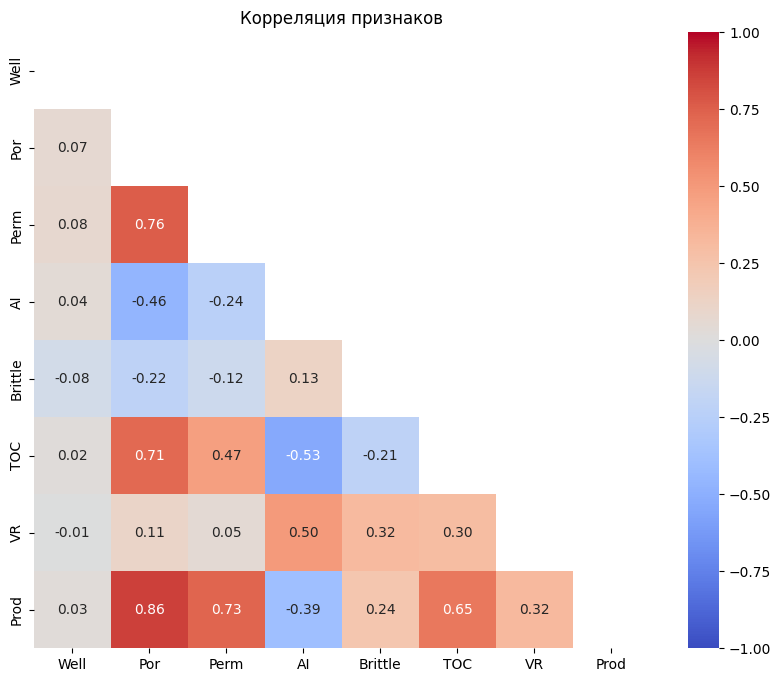

In [84]:
#Постройте корреляционную матрицу факторов, включив в неё целевой признак.
def plot_correlation_matrix(data):
    # Построение корреляционной матрицы факторов, с включением в неё целевого признака.
    pearson_corr_matrix = data.corr(method='pearson')

    # Создание маски для скрытия повторяющихся значений
    mask = np.triu(np.ones_like(pearson_corr_matrix, dtype=bool))

    # Создание фигуры
    plt.figure(figsize=(10, 8))

    # Заголовок
    plt.title(f'Корреляция признаков', fontsize=12)

    # Отображение матрицы корреляции
    sns.heatmap(pearson_corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar=True, square=True)

    # Отображение графика
    plt.show()

# Включение целевой переменной в корреляционную матрицу
plot_correlation_matrix(data)

In [85]:
pearson_corr_matrix = data.corr(method='pearson')

In [86]:
# Топ-3 скореллированных признака с целевым признаком
print('Топ-3 скореллированных признака с целевым признаком')
display(pearson_corr_matrix
        .drop('Prod', axis=0)['Prod']
        .sort_values(ascending=False)
        .head(3))

Топ-3 скореллированных признака с целевым признаком


Por     0.861910
Perm    0.727426
TOC     0.654445
Name: Prod, dtype: float64

In [87]:
#Вычислите ранг полученной матрицы корреляций
np.linalg.matrix_rank(pearson_corr_matrix)

8

In [88]:
#Вычислите определитель матрицы корреляций
np.round(np.linalg.det(pearson_corr_matrix), 4)

0.0007

Корреляционная матрица плохо обусловлена, определитель близок к 0.

## Задание 2.2

In [89]:
#Создайте матрицу наблюдений. Обозначьте её за X, а вектор правильных ответов — за y .

#Создаем матрицы наблюдений X, исключая столбец с целевым признаком
X = data.drop('Prod', axis=1).values
# Добавляем столбц единиц к матрице X для учета свободного коэффициента в модели
ones = np.ones((data.shape[0], 1))
X_ones = np.hstack((ones, X))

# Вектор правильных ответов —  y
y = data['Prod'].values

In [90]:
#Постройте модель линейной регрессии по методу наименьших квадратов.
#Для этого используйте матричную формулу NumPy.
#В качестве ответа укажите полученные оценки коэффициентов модели

# Матрица признаков X_ones (с добавленным столбцом единиц)
# Вектор правильных ответов y
X_ones = np.hstack((np.ones((len(X), 1)), X))
# Переформатирование вектора правильных ответов в двумерный массив
y = y.reshape(-1, 1)

# Вычисление оценок коэффициентов модели линейной регрессии
coefficients = np.linalg.inv(X_ones.T @ X_ones) @ X_ones.T @ y

# Вывод оценок коэффициентов модели
print('Оценки коэффициентов модели:')
print(coefficients)

Оценки коэффициентов модели:
[[-1.23230803e+03]
 [ 5.07003631e-02]
 [ 2.30179140e+02]
 [ 1.16239006e+02]
 [-3.65202301e+02]
 [ 2.49943700e+01]
 [-7.84009294e+01]
 [ 7.85259815e+02]]


In [91]:
# Решение OLS-регрессии с использованием numpy.linalg.lstsq
# Функция lstsq возвращает не только вектор весов, но и еще несколько значений,
# в этом случае rcond=None гарантирует, что предупреждение о ранге будет выведено только в случае проблем
print(f'Вектор весов: \n{np.linalg.lstsq(X_ones, y, rcond=None)[0]}, \n\n Детерминант: {np.linalg.lstsq(X_ones, y, rcond=None)[2]}')

Вектор весов: 
[[-1.23230803e+03]
 [ 5.07003631e-02]
 [ 2.30179140e+02]
 [ 1.16239006e+02]
 [-3.65202301e+02]
 [ 2.49943700e+01]
 [-7.84009294e+01]
 [ 7.85259815e+02]], 

 Детерминант: 8


In [92]:
# Оценки коэффициентов модели линейной регрессии
coefficients_ols = np.linalg.lstsq(X_ones, y, rcond=None)[0]

# Создание DataFrame для хранения оценок
# Имена коэффициентов формируются с добавлением префикса 'w_' к названиям признаков
w_names = list(map(lambda x: 'w_' + x, (['0'] + list(data.columns)[:-1])))
w = pd.DataFrame(coefficients_ols, index=w_names, columns=['w_hat'])

# Вывод таблицы с оценками коэффициентов
print('OLS коэффициенты:')
display(w)

OLS коэффициенты:


,w_hat
w_0,-1232.308030
w_Well,0.050700
w_Por,230.179140
w_Perm,116.239006
w_AI,-365.202301
w_Brittle,24.994370
w_TOC,-78.400929
w_VR,785.259815


In [93]:
print('Первые 4 элемента вектора оценок с округлением:')
display(np.round(w.head(4)))

# Поиск неинформативного признака
# Неинформативный признак определяется по нулевому значению его коэффициента
non_informative_feature = w[w['w_hat'] == 0]
print(f'Признак {w.index[1]} является не информативным')

Первые 4 элемента вектора оценок с округлением:


,w_hat
w_0,-1232.0
w_Well,0.0
w_Por,230.0
w_Perm,116.0


Признак w_Well является не информативным


## Задание 2.3

In [94]:
#Постройте прогноз выработки газа для скважины с параметрами, указанными ниже.
#Чему равна абсолютная ошибка построенного вами прогноза для предложенной скважины ?(в миллионах кубических футов в день).

# Новый вектор признаков
new_data = np.array([106, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42, 4748.315024])
# Создание DataFrame с новым вектором признаков
gas_production = pd.DataFrame([new_data], columns=data.columns, index=[len(data)])
display(gas_production)

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
200,106.0,15.32,3.71,3.29,55.99,1.35,2.42,4748.315024


Метрика MAPE:

![](https://miro.medium.com/max/596/1*vmIM1jePXsDxPpgWEQ35Lg.png)

In [95]:
#Постройте прогноз выработки газа для всех скважин из обучающего набора данных.
#Чему равно значение метрики MAPE вашей модели?
# Вектор признаков с добавленной единицей в начале
new_data_with_intercept = np.insert(new_data[:-1], 0, 1)

# Вывод вектора признаков
print('Вектор признаков:')
print(new_data_with_intercept)

# Скалярное произведение вектора признаков и коэффициентов регрессии
dot_product = np.dot(new_data_with_intercept, coefficients_ols)

# Вывод скалярного произведения
print(f'Скалярное произведение: {dot_product}')


Вектор признаков:
[  1.   106.    15.32   3.71   3.29  55.99   1.35   2.42]
Скалярное произведение: [4723.06405371]


In [118]:

# Вычисление абсолютной ошибки прогноза для конкретной скважины
absolute_error = np.round(np.abs(new_data[-1] - dot_product))

# Вывод абсолютной ошибки прогноза для указанной скважины
print(f'Абсолютная ошибка прогноза для скважины: {absolute_error} mcf/day')

Абсолютная ошибка прогноза для скважины: [25.] mcf/day


In [97]:
# Прогнозы с использованием оцененных коэффициентов
y_predictions = X_ones @ coefficients_ols

# Вычисление абсолютной ошибки
absolute_error = np.abs(y - y_predictions)

# Вычисление MAPE
mape = np.mean(np.abs((y - y_predictions) / y)) * 100

# Вывод значений MAPE и абсолютной ошибки
print(f'Значение MAPE: {mape}%')


Значение MAPE: 3.6279468451338426%


In [98]:
print('Сравнение знаков коэффициентов регрессии и знаков корреляции факторов')
# Сравнение знаков коэффициентов регрессии и знаков корреляции факторов
compare = w[1:].copy().set_index(pd.Index(data.drop('Prod', axis=1).columns))
pearson_corr_matrix = data.corr(method='pearson')
corr = pearson_corr_matrix.drop('Prod', axis=0)['Prod'].values
# Добавление столбца с корреляциями к DataFrame для сравнения
compare['corr_with_target'] = corr
# Создание столбца-индикатора сравнения знаков
compare['result'] = compare['w_hat'] * compare['corr_with_target'] >=0
display(compare)

Сравнение знаков коэффициентов регрессии и знаков корреляции факторов


,w_hat,corr_with_target,result
Well,0.050700,0.026817,True
Por,230.179140,0.861910,True
Perm,116.239006,0.727426,True
AI,-365.202301,-0.390835,True
Brittle,24.994370,0.237155,True
TOC,-78.400929,0.654445,False
VR,785.259815,0.323182,True


Задание 2.4

Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целью прямая, а модель говорит обратное.

In [99]:
# Фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции
compare[compare['result'] == False]

,w_hat,corr_with_target,result
TOC,-78.400929,0.654445,False


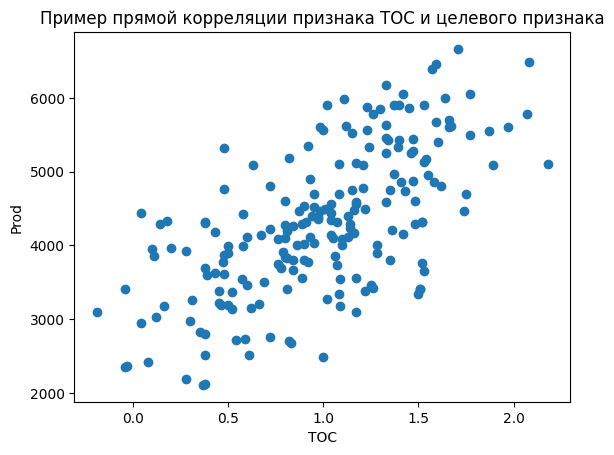

In [100]:
# Построение диаграммы рассеяния
plt.scatter(data['TOC'], data['Prod'])
plt.xlabel('TOC')
plt.ylabel('Prod')
plt.title('Пример прямой корреляции признака TOC и целевого признака')
plt.show()

Из графика видно, что зависимость прямая и линейная, т.к. наличие сильной мультиколлинеарности в данных, «портит» коэффициенты.

## Задание 2.5

In [120]:
#Исключите из данных сильно коррелированные между собой факторы.
print('Топ признаков по коллинеарности друг к другу:')
features = data.drop('Prod', axis=1)
features_corr = features.corr()
# Установка диагональных элементов в 0 для предотвращения сравнения самих с собой
for col in features_corr.columns:
    features_corr[col][col] = 0
# Вывод топовых признаков по коллинеарности
features_corr_top = features_corr.abs().max().sort_values(ascending=False)
display(features_corr_top)

Топ признаков по коллинеарности друг к другу:


Por        0.760546
Perm       0.760546
TOC        0.711831
AI         0.531864
VR         0.499143
Brittle    0.317929
Well       0.079252
dtype: float64

In [102]:
# Высококоррелирующие признаки (> 0.7)
hig_cor_delete_candidate = features_corr_top[features_corr_top > 0.7]
hig_cor_delete_candidate

Por     0.760546
Perm    0.760546
TOC     0.711831
dtype: float64

In [103]:
# Список признаков с низкой корреляцией к таргету (< 0.05)
print('Топ корреляций к таргету:')
high_corr_to_target = pearson_corr_matrix.drop('Prod', axis=0)['Prod'].sort_values(ascending=False).abs()
display(high_corr_to_target)
low_corr_list = list(high_corr_to_target[high_corr_to_target < 0.05].index)
print(f'Признак с низкой корреляцией к таргету: {low_corr_list}')

Топ корреляций к таргету:


Por        0.861910
Perm       0.727426
TOC        0.654445
VR         0.323182
Brittle    0.237155
Well       0.026817
AI         0.390835
Name: Prod, dtype: float64

Признак с низкой корреляцией к таргету: ['Well']


In [104]:
# Список удовлетворяющий двум условиям
data_qood_corr = data.copy().drop(['Perm', 'Well', 'TOC'], axis=1)
data_qood_corr

,Por,AI,Brittle,VR,Prod
0,12.08,2.80,81.40,2.31,4165.196191
1,12.38,3.22,46.17,1.88,3561.146205
2,14.02,4.01,72.80,2.72,4284.348574
3,17.67,2.63,39.81,1.88,5098.680869
4,17.52,3.18,10.94,1.90,3406.132832
...,...,...,...,...,...
195,11.95,2.97,67.18,2.06,3847.571003
196,17.99,3.38,44.32,2.08,5601.227131
197,12.12,3.52,57.07,1.73,3409.575363
198,15.55,2.48,58.25,2.35,5087.592149


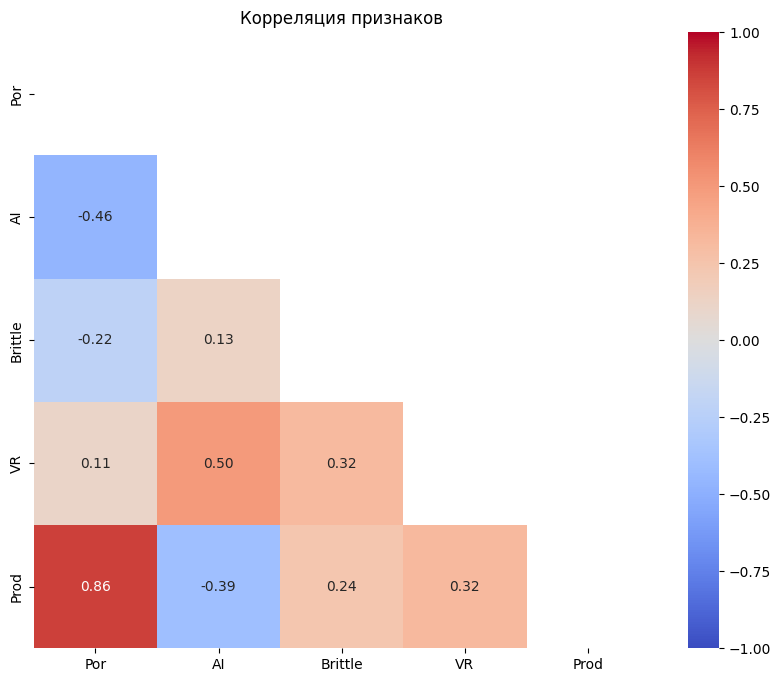

In [105]:
plot_correlation_matrix(data_qood_corr)

In [106]:
#Постройте линейную регрессию на обновлённых после удаления факторов данных по методу наименьших квадратов.

X_new = data_qood_corr.drop('Prod', axis=1).values
ones_new = np.ones((data_qood_corr.shape[0], 1))
X_ones_new = np.hstack((ones_new, X_new))
y_new = data_qood_corr['Prod'].values

# Повторно применяем метод наименьших квадратов
w_hat_new = np.linalg.inv(X_ones_new.T @ X_ones_new) @ X_ones_new.T @ y_new
print(w_hat_new)

[-1835.44646069   293.03624565  -200.03091206    27.64098209
   517.40272597]


In [107]:
# Сделайте прогноз для всего обучающего набора данных и рассчитайте метрику MAPE (Mean Absolute Percentage Error).
# Прогноз для всего обучающего набора
y_pred_all = X_ones_new @ w_hat_new

# Рассчитайте MAPE
mape = np.mean(np.abs((y_new - y_pred_all) / y_new)) * 100

# Выведите значение MAPE
print(f'MAPE: {mape:.1f}%')

MAPE: 4.0%


In [108]:
# Выводим коэффициенты новой модели
w_names_new = list(map(lambda x: 'w_' + x, (['0'] + list(data_qood_corr.columns)[:-1])))
w_new = pd.DataFrame(w_hat_new, index=w_names_new, columns=['w_hat'])
print('Новые коэффициенты линейной регрессии')
display(round(w_new))

Новые коэффициенты линейной регрессии


,w_hat
w_0,-1835.0
w_Por,293.0
w_AI,-200.0
w_Brittle,28.0
w_VR,517.0


In [109]:
print('Сравнение знаков коэффициентов регрессии и знаков корреляции факторов')
pearson_corr_matrix = data_qood_corr.corr()
compare = w_new[1:].copy().set_index(pd.Index(data_qood_corr.drop('Prod', axis=1).columns))
corr = pearson_corr_matrix.drop('Prod', axis=0)['Prod'].values
compare['corr_with_target'] = corr
compare['result'] = compare['w_hat'] * compare['corr_with_target'] >=0
display(compare)

Сравнение знаков коэффициентов регрессии и знаков корреляции факторов


,w_hat,corr_with_target,result
Por,293.036246,0.861910,True
AI,-200.030912,-0.390835,True
Brittle,27.640982,0.237155,True
VR,517.402726,0.323182,True


In [110]:
# Детерминант
np.round(np.linalg.det(pearson_corr_matrix), 4)

0.0202

Так как удалось побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции, знаки корреляций совпадают со знаками коэффициентов регрессии.

## Задание 3.1

In [111]:
#Сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей
from sklearn.preprocessing import PolynomialFeatures

# Выбираем факторы, для которых хотим создать полиномиальные признаки
selected_factors = ['Por', 'AI', 'Brittle', 'VR']

# Выбираем соответствующие столбцы из  DataFrame
X_selected = data[selected_factors].values

# Используем PolynomialFeatures для создания полиномиальных признаков
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_selected = poly.fit_transform(X_selected)

# Выведем количество факторов после генерации полиномиальных признаков
num_factors_poly = X_poly_selected.shape[1]

print(f'Количество факторов после генерации полиномиальных признаков: {num_factors_poly}')

Количество факторов после генерации полиномиальных признаков: 34


In [112]:
#Обучите модель линейной регрессии из библиотеки sklearn (LinearRegression) на полученных полиномиальных факторах.
def polynomial_regression_sk(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=False)
    X_poly = poly.fit_transform(X)
    lr = LinearRegression()
    # оцениваем качество модели на кросс-валидации, метрика — MAPE
    cv_results = cross_validate(lr, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
    train_res = cv_results["train_score"].mean()* 100
    test_res = cv_results["test_score"].mean()* 100
    return X_poly, train_res, test_res

In [113]:
#Оцените среднее значение метрики MAPE, используя кросс-валидацию на пяти фолдах.
k = 2
X_poly, train_res, test_res = polynomial_regression_sk(X, y, k)
print('--')
print(f'Порядок полинома: {k}')
print(f'MAPE на тренировочных фолдах: {round(-train_res, 3)} %')
print(f'MAPE на валидационных фолдах: {round(-test_res, 3)} %')
# считаем матрицу корреляций (без столбца из единиц)
C = pd.DataFrame(X_poly[:, 1:]).corr()
# считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(C))
# считаем количество факторов (не включая столбец из единиц)
print('Количество факторов:', X_poly[:, 1:].shape[1])


--
Порядок полинома: 2
MAPE на тренировочных фолдах: 1.447 %
MAPE на валидационных фолдах: 2.106 %
Ранг корреляционной матрицы: 34
Количество факторов: 34


## Задание 3.2

In [114]:
# Обучите модель Lasso из библиотеки sklearn на полученных полиномиальных факторах, предварительно стандартизировав факторы с помощью StandardScaler. Коэффициент регуляризации выставите равным 5.
def polynomial_standard_regression_l1_sk(X, y, k, alpha):
    # инициализируем стандартизатор StandardScaler
    scaler = StandardScaler()
    # подгоняем параметры стандартизатора (вычисляем среднее и СКО)
    X_st = scaler.fit_transform(X)
    poly = PolynomialFeatures(degree=k, include_bias=False)
    X_poly_st = poly.fit_transform(X_st)
    # создаём модель линейной регрессии c L1-регуляризацией
    lasso = Lasso(alpha=alpha)
    # оцениваем качество модели на кросс-валидации, метрика — MAPE
    cv_results = cross_validate(
        lasso,
        X_poly_st,
        y,
        scoring='neg_mean_absolute_percentage_error',
        cv=5,
        return_train_score=True)
    train_res = cv_results["train_score"].mean()* 100
    test_res = cv_results["test_score"].mean()* 100
    return X_poly_st, train_res, test_res

In [115]:
#Оцените среднее значение метрики MAPE, используя кросс-валидацию на пяти фолдах.
k = 2 # степень полинома
alpha = 5 # L_1 коэффициент регуляризации
X_poly_st_l1, train_res, test_res = polynomial_standard_regression_l1_sk(X, y, k, alpha)

print(f'Порядок полинома: {k}')
print(f'Значение L1 регуляризации: {alpha}')
print(f'MAPE на тренировочных фолдах: {round(-train_res, 2)} %')
print(f'MAPE на валидационных фолдах: {round(-test_res, 2)} %')
# считаем матрицу корреляций (без столбца из единиц)
D = pd.DataFrame(X_poly_st_l1[:, 1:]).corr()
# считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(D))
# считаем количество факторов (не включая столбец из единиц)
print('Количество полиномиальных факторов:', X_poly_st_l1[:, 1:].shape[1])

Порядок полинома: 2
Значение L1 регуляризации: 5
MAPE на тренировочных фолдах: 1.48 %
MAPE на валидационных фолдах: 1.79 %
Ранг корреляционной матрицы: 34
Количество полиномиальных факторов: 34


## Задание 3.3

In [125]:
#Обучите модель Ridge из библиотеки sklearn на полученных полиномиальных факторах, предварительно стандартизировав факторы с помощью StandardScaler. Коэффициент регуляризации выставите равным 1.

#Оцените среднее значение метрики MAPE, используя кросс-валидацию на пяти фолдах.
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Стандартизация полиномиальных признаков
scaler = StandardScaler()
X_poly_selected_scaled = scaler.fit_transform(X_poly_selected)

# Создание модели Ridge
ridge_model = Ridge(alpha=1)

# Создание пайплайна с использованием стандартизации и модели Ridge
model = make_pipeline(StandardScaler(), Ridge(alpha=1))
# Рассчитываем MAPE с использованием кросс-валидации на полиномиальных признаках
cv_results = cross_val_score(model, X_poly_selected, y,
                             scoring='neg_mean_absolute_percentage_error', cv=5)

# Усредняем результаты
mape_cv_mean = -cv_results.mean() * 100

# Выводим среднее значение MAPE
print(f'Среднее значение MAPE для модели Ridge с использованием кросс-валидации: {mape_cv_mean:.2f}%')
print(f'Порядок полинома: {k}')
print(f'Значение L2 регуляризации: 1')
# считаем матрицу корреляций (без столбца из единиц)
# считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(D))
print(f'MAPE на тренировочных фолдах: {round(-train_res, 2)} %')
print(f'MAPE на валидационных фолдах: {round(-test_res, 2)} %')

Среднее значение MAPE для модели Ridge с использованием кросс-валидации: 2.48%
Порядок полинома: 2
Значение L2 регуляризации: 1
Ранг корреляционной матрицы: 34
MAPE на тренировочных фолдах: 1.48 %
MAPE на валидационных фолдах: 1.79 %


Задание 3.4

Это задание необязательно к выполнению, но за него можно получить дополнительный балл.

Вы обучили модели с L_1 и L_2 регуляризациями, отлично! Однако есть еще более продвинутая модель, которая объединяет в себе обе этих регуляризации. Она реализуется с помощью класса sklearn.linear_model.ElasticNet. Найдите документацию для данного класса и реализуйте модель с его помощью. Оцените среднее значение метрики MAPE, используя кросс-валидацию на пяти фолдах.
Переберите несколько значений для аргумента l1_ratio, который отвечает за комбинацию двух типов регуляризации (например, с помощью цикла). Выберите значение этого параметра, для которого качество получается наилучшим.

In [117]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np

# Определяем l1_ratio
l1_ratios = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0]

# Определяем модель ElasticNetCV с автоматическим выбором параметров
elastic_net_model = ElasticNetCV(l1_ratio=l1_ratios, cv=5, max_iter=10000, random_state=42)

# Оцениваем качество модели с использованием кросс-валидации и MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
cross_val_results = cross_val_score(elastic_net_model, X_poly_selected_scaled, y, cv=5, scoring=mape_scorer)

# Выводим среднее значение MAPE для каждого значения l1_ratio
for l1_ratio, mape_score in zip(l1_ratios, -cross_val_results):
    print(f'l1_ratio={l1_ratio}, MAPE={mape_score.mean()}%')

# Выбираем значение l1_ratio с наилучшим качеством
best_l1_ratio = l1_ratios[np.argmax(cross_val_results)]
print(f'Наилучшее значение l1_ratio: {best_l1_ratio}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was e

l1_ratio=0.1, MAPE=0.02242566988049729%
l1_ratio=0.5, MAPE=0.02012026231475466%
l1_ratio=0.7, MAPE=0.024939935091070217%
l1_ratio=0.9, MAPE=0.02326622710139753%
l1_ratio=0.95, MAPE=0.02965952319815891%
Наилучшее значение l1_ratio: 0.5
